# Applied Data Visualization – Homework 1
*https://www.dataviscourse.net/2024-applied/*

In this homework, you will review and visualize data from the Utah Avalanche Center https://utahavalanchecenter.org/observations

# Your info

*First name: Logan* 

*Last name: Correa*

*Email: logan.correa@utah.edu*

*UID u1094034*

In [167]:
# the standard input statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Load in data

Load in the provided file `avalanches.csv` using the Pandas `read_csv` function.

Print a couple of rows to get a sense of the data.

In [168]:
# import data
df = pd.read_csv('avalanches.csv')
df.head()


,Date,Region,Place,Trigger,Trigger: additional info,Weak Layer,Depth,Width,Vertical,Aspect,...,Buried - Fully,Injured,Killed,Accident and Rescue Summary,Terrain Summary,Weather Conditions and History,Comments 1,Comments 2,Comments 3,Comments 4
0,11/9/2012,Salt Lake,Sunset Peak,Snowboarder,Unintentionally Triggered,New Snow/Old Snow Interface,"14""",80',30',North,...,NaN,NaN,NaN,NaN,NaN,NaN,While it was a small avalanche that was I caug...,NaN,NaN,NaN
1,11/10/2012,Salt Lake,Pioneer Ridge,Skier,Remotely Triggered,Facets,2',20',125',North,...,NaN,NaN,NaN,NaN,NaN,NaN,Directly above cat track leading to lift. Cat...,NaN,NaN,NaN
2,11/10/2012,Salt Lake,Pioneer Bowl,Natural,NaN,Facets,NaN,NaN,NaN,North,...,NaN,NaN,NaN,NaN,NaN,NaN,"Looked and felt like winter today, nice to be ...",NaN,NaN,NaN
3,11/11/2012,Salt Lake,Patsy Marly,Skier,Unintentionally Triggered,New Snow/Old Snow Interface,2.5',100',100',North,...,NaN,NaN,NaN,NaN,NaN,NaN,A North facing aspect with an exposed ridge in...,NaN,NaN,NaN
4,11/11/2012,Salt Lake,Two Dogs,Skier,Remotely Triggered,Facets,3',70',450',North,...,NaN,NaN,NaN,NaN,NaN,NaN,Remotely triggered all the new storm snow (abo...,NaN,NaN,Additional comments by another backcountry obs...


## Part 2: Clean dates

You may notice that the dates of avalanches are provided in the `Date` column, however they are encoded as a string.

Additionally, we may want to analyze avalanches by year and by month, so let's create separate columns for those.

1. Convert the Date column to datetime format
2. Create a new column Year
3. Create a new column Month

In [169]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create a new column for the year and convert to integer
df['Year'] = df['Date'].dt.year.astype('Int64')

# Create a new column for the month
df['Month'] = df['Date'].dt.month_name()

#display(df.head())


## Part 3: Cleaning up Numerical Columns

You may also notice that numerical columns (`Elevation`, `Depth`, `Width`, `Vertical`) are encoded as strings. Moreover, some are in feet ('), while others are in inches (").

First, create a new column Elevation_Feet, with the Elevation column converted to a number, in feet

In [170]:
# Remove commas and feet symbol from the 'Elevation' column
df['Elevation_Feet'] = df['Elevation'].str.replace(",", "").str.replace("'", "")

# Convert the cleaned string to integer, handling NaN values appropriately
df['Elevation_Feet'] = pd.to_numeric(df['Elevation_Feet'], errors='coerce')

#display(df.head())


Then, create three new columns in inches: 
   1. Depth_Inches, with the Depth column converted to a number, in inches
   2. Width_Inches, with the Width column converted to a number, in inches
   3. Vertical_Inches, with the Vertical column converted to a number, in inches

We recommend that you write a function that converts the string into a number and then use that function to clean up the columns. Note that you will also have to handle undefined (NaN) values.

In [171]:
# create columns
df['Depth_Inches'] = df['Depth']
df['Width_Inches'] = df['Width']
df['Vertical_Inches'] = df['Vertical']

# function to convert columns to numeric
def convert_str_to_numeric(df, column):
    df[column] = df[column].str.replace(",", "").str.replace("'", "").str.replace('"', '')
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

# convert columns to numeric
df = convert_str_to_numeric(df, 'Depth_Inches')
df = convert_str_to_numeric(df, 'Width_Inches')
df = convert_str_to_numeric(df, 'Vertical_Inches')

#display(df.head())

## Part 4: Plotting

4.1: Plot a histogram of the Depth_Inches variable using the built-in pandas plotting function. 

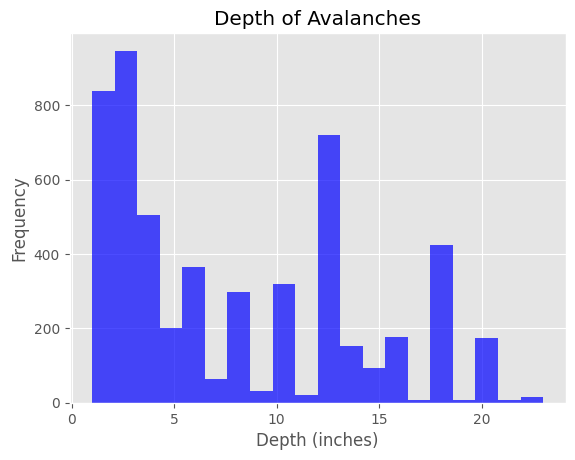

In [172]:
# plot histogram of depth_inches
df['Depth_Inches'].hist(bins=20, color='blue', alpha=0.7)
plt.xlabel('Depth (inches)')
plt.ylabel('Frequency')
plt.title('Depth of Avalanches')
plt.show()


4.2: Then plot a histogram of the elevation in feet variable.

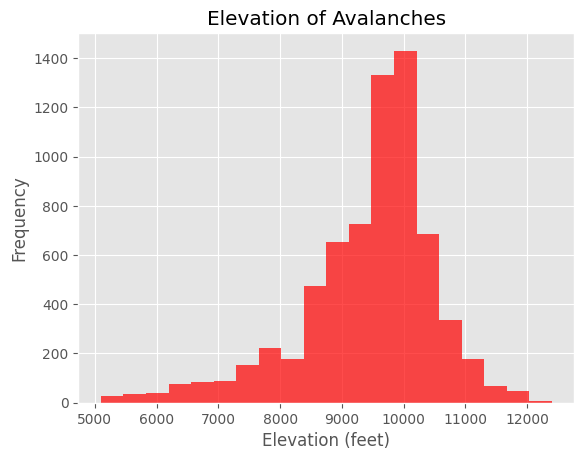

In [173]:
#plot elevation_feet
df['Elevation_Feet'].hist(bins=20, color='red', alpha=0.7)
plt.xlabel('Elevation (feet)')
plt.ylabel('Frequency')
plt.title('Elevation of Avalanches')
plt.show()

4.3: Next, plot a bar chart of the number of avalances by year
(Hint: You may find it useful to create a separate data frame, grouped by year.)

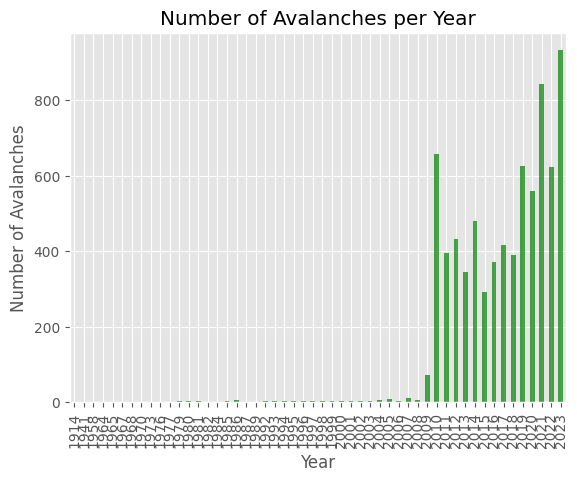

In [174]:
# create new df grouped by year
df_year = df.groupby('Year')

# plot bar chart of number of avalanches per year
df_year.size().plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Avalanches')
plt.title('Number of Avalanches per Year')
plt.show()


4.4: Once you have done that, you will see that the Utah Avalanche Center does not have complete data for earlier years. Let's filter them out to see the barchart more clearly

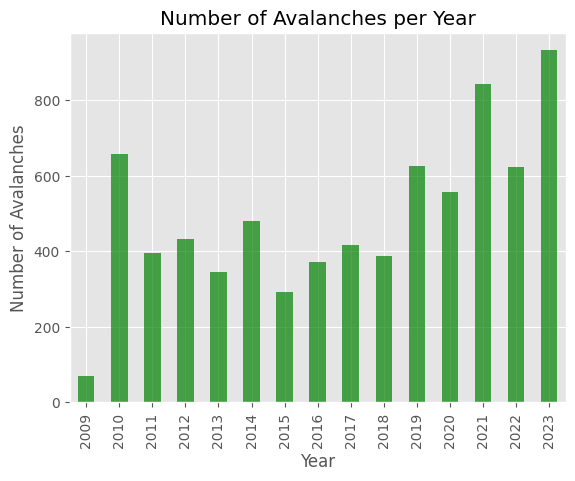

In [177]:
# remove years before 1998
df_year_filtered = df[df['Year'] >= 2009]

# group by year
df_year_filtered = df_year_filtered.groupby('Year')

# Count the number of avalanches per year
avalanches_per_year = df_year_filtered['Year'].value_counts().sort_index()

# Plot bar chart of the number of avalanches per year
avalanches_per_year.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Avalanches')
plt.title('Number of Avalanches per Year')
plt.show()

4.5: Create a barchart of the number of avalanches per month
(Hint: You may find it useful to create a separate data frame, grouped by month.)

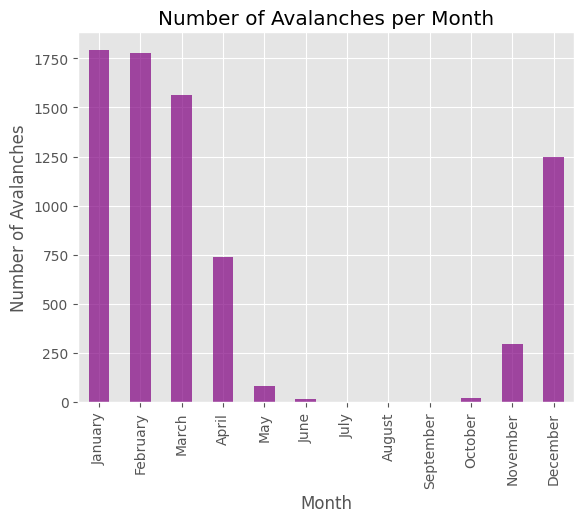

In [182]:
# Group by month and count the number of avalanches
avalanches_per_month = df.groupby('Month').size()

# Define the correct order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Reindex the series to have months in the correct order
avalanches_per_month = avalanches_per_month.reindex(month_order)

# Plot bar chart of the number of avalanches per month
avalanches_per_month.plot(kind='bar', color='purple', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Number of Avalanches')
plt.title('Number of Avalanches per Month')
plt.show()

4.6: Create a boxplot of the elevation of avalances by month

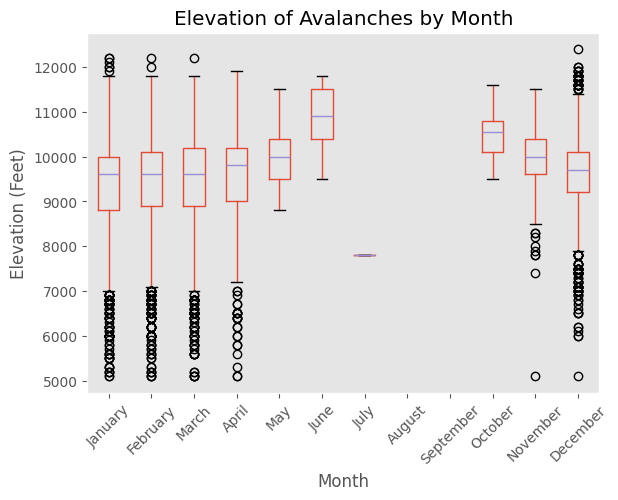

In [188]:
# Ensure the 'Month' column is in the correct order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Create a boxplot of Elevation_Feet by Month
df.boxplot(column='Elevation_Feet', by='Month', grid=False, rot=45)
plt.ylabel('Elevation (Feet)')
plt.title('Elevation of Avalanches by Month')
plt.suptitle('')
plt.show()



4.6:  Create a horizontal barchart of the number of avalanches by trigger

(Hint: You may find it useful to create a separate data frame, grouped by trigger.)

In [ ]:
# your code here


4.7: Create a boxplot of the depth of avalances by trigger

In [ ]:
# your code here

# Part 5: Analysis – What did we learn?
Please answer the following questions in (brief) writing.

- What does the distribution of avalanche depths and elevations look like? 
- What year had the most avalanches? How many?
- What month had the most avalanches? How many?
- What month gets the highest elevation avalanches? How many feet, on average?
- What is the most common avalanche trigger?
- What avalanche trigger yields the deepest avalanches? How many inches deep, on average?

Your Answer Here!


# Part 6: Bonus – Are Avalanches with Fatalities Different?

Compare avalanches without and with fatalities using visualziations. Are there any differences you notice?#

# Grading Scheme

Part 1: 5%  
Part 2: 15%  
Part 3: 25%  
Part 4: 40%, 5% per sub-itme  
Part 5: 15%  
Part 6 (Bonus): 10%  